# I. Prepare data

**[1.1]** Create a df to store the csv file paths

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
import pandas as pd

def gather_file_paths(root_folder):
    file_paths = []
    
    # Walk through the directory
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an image (you can add more extensions as needed)
            if file.lower().endswith(('.csv')):
                # Create the full path to the image
                full_path = os.path.join(subdir, file)
                file_paths.append(full_path)
                
    return file_paths

In [4]:
root_folder = '/kaggle/input/itineraries'
csv_paths = gather_file_paths(root_folder)

# Create a DataFrame
df_csv = pd.DataFrame(csv_paths, columns=['csv_path'])

In [7]:
sample_df=pd.read_csv(df_csv['csv_path'].iloc[0])

In [10]:
df_csv['csv_path'].iloc[0]

'/kaggle/input/itineraries/PHL/PHL_itineraries_ul.csv'

In [12]:
sample_df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode'],
      dtype='object')

In [13]:
df_csv.head()

csv_path
0  /kaggle/input/itineraries/PHL/PHL_itineraries_...
1  /kaggle/input/itineraries/PHL/PHL_itineraries_...
2  /kaggle/input/itineraries/PHL/PHL_itineraries_...
3  /kaggle/input/itineraries/PHL/PHL_itineraries_...
4  /kaggle/input/itineraries/PHL/PHL_itineraries_...

**[1.2]** Combine all csv files to create a dataframe

In [14]:
# Initialize an empty list to store DataFrames
dataframes = []

# oop through each file path in df_csv and read the CSV files
for file_path in df_csv['csv_path']:
    df = pd.read_csv(file_path)  # Read the CSV file
    dataframes.append(df)        # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
df= pd.concat(dataframes, ignore_index=True)

In [15]:
df.head()

legId  searchDate  flightDate startingAirport  \
0  3f75794c8a0efa7d771e90b59e9b98bf  2022-05-08  2022-06-14             PHL   
1  f0d898440a687339740f6a7e3727f2e3  2022-05-08  2022-06-14             PHL   
2  0d8cc1d1413b37db9e24b8171130bbb0  2022-05-08  2022-06-14             PHL   
3  526719870f54213de8b6867a91c2e14e  2022-05-08  2022-06-14             PHL   
4  d00d4adfa46de9d804ccac81530f0abd  2022-05-08  2022-06-14             PHL   

  destinationAirport travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                ATL        PT2H20M           False         False       True   
1                ATL        PT2H14M           False         False       True   
2                ATL        PT2H21M           False         False       True   
3                ATL        PT8H13M           False         False      False   
4                ATL        PT10H4M           False         False      False   

   totalFare  ...  segmentsArrivalTimeEpochSeconds  \
0      42.79  ...                       1655262900   
1      52.99  ...                       1655208840   
2      52.99  ...                       1655265540   
3      87.06  ...           1655210340||1655229480   
4      89.59  ...           1655266320||1655292840   

                              segmentsArrivalTimeRaw  \
0                      2022-06-14T23:15:00.000-04:00   
1                      2022-06-14T08:14:00.000-04:00   
2                      2022-06-14T23:59:00.000-04:00   
3  2022-06-14T08:39:00.000-04:00||2022-06-14T13:5...   
4  2022-06-15T00:12:00.000-04:00||2022-06-15T07:3...   

  segmentsArrivalAirportCode segmentsDepartureAirportCode  \
0                        ATL                          PHL   
1                        ATL                          PHL   
2                        ATL                          PHL   
3                   FLL||ATL                     PHL||FLL   
4                   MCO||ATL                     PHL||MCO   

                    segmentsAirlineName segmentsAirlineCode  \
0                       Spirit Airlines                  NK   
1                     Frontier Airlines                  F9   
2                     Frontier Airlines                  F9   
3      Spirit Airlines||Spirit Airlines              NK||NK   
4  Frontier Airlines||Frontier Airlines              F9||F9   

        segmentsEquipmentDescription segmentsDurationInSeconds  \
0                                NaN                      8400   
1                                NaN                      8040   
2                                NaN                      8460   
3  AIRBUS INDUSTRIE A320 SHARKLETS||               10440||7080   
4                                 ||                9720||5640   

  segmentsDistance segmentsCabinCode  
0              NaN             coach  
1              667             coach  
2              667             coach  
3       None||None      coach||coach  
4         860||399      coach||coach  

[5 rows x 23 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 13519999 entries, 0 to 13519998

Data columns (total 23 columns):

 #   Column                             Dtype  

---  ------                             -----  

 0   legId                              object 

 1   searchDate                         object 

 2   flightDate                         object 

 3   startingAirport                    object 

 4   destinationAirport                 object 

 5   travelDuration                     object 

 6   isBasicEconomy                     bool   

 7   isRefundable                       bool   

 8   isNonStop                          bool   

 9   totalFare                          float64

 10  totalTravelDistance                float64

 11  segmentsDepartureTimeEpochSeconds  object 

 12  segmentsDepartureTimeRaw           object 

 13  segmentsArrivalTimeEpochSeconds    object 

 14  segmentsArrivalTimeRaw             object 

 15  segmentsArrivalAirportCode         object 



**[1.3]** Save the dataframe

In [18]:
# Save the DataFrame to a pickle file
pickle_file_path = 'itineraries.pkl'  # Specify the file path for the pickle file
df.to_pickle(pickle_file_path)

# II.  Data cleaning

**[2.1]** Reload the data

In [1]:
import pickle
import pandas as pd
df = pd.read_pickle('/kaggle/input/itineraries/itineraries.pkl')

**[2.2]** Display the summary statistics of the dataset

In [5]:
df.describe(include='all').T

count   unique  \
legId                                13519999  1721518   
searchDate                           13519999       32   
flightDate                           13519999       92   
startingAirport                      13519999       16   
destinationAirport                   13519999       16   
travelDuration                       13519999     1836   
isBasicEconomy                       13519999        2   
isRefundable                         13519999        2   
isNonStop                            13519999        2   
totalFare                          13519999.0      NaN   
totalTravelDistance                12560380.0      NaN   
segmentsDepartureTimeEpochSeconds    13519999  1273965   
segmentsDepartureTimeRaw             13519999  1374911   
segmentsArrivalTimeEpochSeconds      13519999  1447133   
segmentsArrivalTimeRaw               13519999  1513276   
segmentsArrivalAirportCode           13519999     5986   
segmentsDepartureAirportCode         13519999     5877   
segmentsAirlineName                  13519999      118   
segmentsAirlineCode                  13519999      118   
segmentsEquipmentDescription         13257323     6882   
segmentsDurationInSeconds            13519999   110976   
segmentsDistance                     13393014    12126   
segmentsCabinCode                    13519999       52   

                                                                    top  \
legId                                  ad0cccaf7911a955716eb90254547ac4   
searchDate                                                   2022-05-02   
flightDate                                                   2022-05-24   
startingAirport                                                     LAX   
destinationAirport                                                  LAX   
travelDuration                                                  PT1H25M   
isBasicEconomy                                                    False   
isRefundable                                                      False   
isNonStop                                                         False   
totalFare                                                           NaN   
totalTravelDistance                                                 NaN   
segmentsDepartureTimeEpochSeconds                            1653040800   
segmentsDepartureTimeRaw                  2022-05-18T06:00:00.000-04:00   
segmentsArrivalTimeEpochSeconds                              1653278340   
segmentsArrivalTimeRaw                    2022-05-20T23:59:00.000-04:00   
segmentsArrivalAirportCode                                          ORD   
segmentsDepartureAirportCode                                        ORD   
segmentsAirlineName                American Airlines||American Airlines   
segmentsAirlineCode                                              AA||AA   
segmentsEquipmentDescription                             Boeing 737-800   
segmentsDurationInSeconds                                          5100   
segmentsDistance                                             None||None   
segmentsCabinCode                                          coach||coach   

                                       freq         mean         std    min  \
legId                                    35          NaN         NaN    NaN   
searchDate                           540011          NaN         NaN    NaN   
flightDate                           285643          NaN         NaN    NaN   
startingAirport                     1352275          NaN         NaN    NaN   
destinationAirport                  1295126          NaN         NaN    NaN   
travelDuration                        53758          NaN         NaN    NaN   
isBasicEconomy                     12768661          NaN         NaN    NaN   
isRefundable                       13519808          NaN         NaN    NaN   
isNonStop                           9564064          NaN         NaN    NaN   
totalFare                               NaN   373.753516

**[2.3]** Create a dataframe name *df_selected* for selected columns and perform preprocessing

In [2]:
df_selected=df[['startingAirport', 
    'destinationAirport', 
    'flightDate', 
    'segmentsDepartureTimeRaw', 
    'segmentsCabinCode','totalFare','isRefundable','isNonStop','isBasicEconomy']]

In [3]:
# Convert the specified columns to lists
df_selected['segmentsDepartureTimeRaw'] = df_selected['segmentsDepartureTimeRaw'].apply(lambda x: x.split('||'))
df_selected['segmentsCabinCode'] = df_selected['segmentsCabinCode'].apply(lambda x: x.split('||'))

In [4]:
df_selected['no_of_trip'] = df_selected['segmentsCabinCode'].apply(len)

In [5]:
import pandas as pd
from datetime import datetime

# Function to find the earliest timestamp and its index in a list
def find_earliest_timestamp_and_index(timestamps):
    if isinstance(timestamps, list) and len(timestamps) > 0:
        # Convert all timestamps to datetime objects
        datetime_objects = [datetime.fromisoformat(ts.replace('Z', '+00:00')) for ts in timestamps]
        # Find the earliest timestamp and its index
        earliest_index = datetime_objects.index(min(datetime_objects))
        earliest_timestamp = min(datetime_objects)
        return earliest_index, earliest_timestamp
    return None, None

# Create a column for the earliest departure timestamp and its index using .loc
df_selected.loc[:, 'earliest_departure_index'], df_selected.loc[:, 'earliest_departure'] = zip(
    *df_selected['segmentsDepartureTimeRaw'].apply(find_earliest_timestamp_and_index)
)

# Ensure earliest_departure is in datetime format and convert to UTC if necessary
df_selected['earliest_departure'] = pd.to_datetime(df_selected['earliest_departure'], utc=True)

# Create 'Departure Date' and 'Departure Time' columns
df_selected['Departure Date'] = df_selected['earliest_departure'].dt.date
df_selected['Departure Time'] = df_selected['earliest_departure'].dt.time

**[2.4]** Save the processed dataframe

In [6]:
df_selected.to_pickle('/kaggle/working/processed_ver2.pkl')

In [10]:
import os
from IPython.display import FileLink

# Set the working directory to /kaggle/working
os.chdir(r'/kaggle/working')

# Display a download link for the processed_ver2.pkl file
display(FileLink(r'processed_ver2.pkl'))

/kaggle/working/processed_ver2.pkl

**[2.5]** Reload the processed dataframe

In [1]:
import pandas as pd
df_selected=pd.read_pickle("/kaggle/input/itineraries/processed_ver2.pkl")

**[2.6]** Process the `Departure Time` column and perform encoding for categories columns

In [7]:
df_selected['Departure Time'] = pd.to_datetime(df_selected['Departure Time'], format='%H:%M:%S')

In [8]:
# Extract hour and minute
df_selected['Hour'] = df_selected['Departure Time'].dt.hour
df_selected['Minute'] = df_selected['Departure Time'].dt.minute

In [9]:
df_selected=df_selected.drop('Departure Time',axis=1)

In [10]:
# Convert the list-like column to strings for easier manipulation
df_selected['segmentsCabinCode'] = df_selected['segmentsCabinCode'].apply(lambda x: ','.join(x))

# Define the categories
predominantly_coach_combinations = [
    'coach', 'coach,coach', 'coach,coach,coach', 'coach,coach,coach,coach'
]

mixed_coach_premium_coach_combinations = [
    'coach,premium coach', 'premium coach,coach', 'premium coach', 
    'premium coach,coach,coach'
]

first_class_combinations = [
    'first', 'first,first', 'first,coach', 'first,first,first', 
    'first,coach,coach'
]

business_class_combinations = [
    'business', 'business,business', 'business,coach', 'business,first'
]

rare_mixed_class_combinations = [
    'coach,coach,premium coach', 'coach,coach,business', 'premium coach,premium coach', 
    'premium coach,first', 'coach,business,first', 'coach,coach,business', 
    'business,coach,coach', 'coach,business',
    'premium coach,coach,coach,coach', 'premium coach,premium coach,premium coach'
]

# Create a function that assigns categories to segmentsCabinCode
def assign_category(value):
    if value in predominantly_coach_combinations:
        return 'Predominantly Coach'
    elif value in mixed_coach_premium_coach_combinations:
        return 'Mixed Coach & Premium Coach'
    elif value in first_class_combinations:
        return 'First Class'
    elif value in business_class_combinations:
        return 'Business Class'
    elif value in rare_mixed_class_combinations:
        return 'Rare & Mixed Class'
    else:
        return 'Other'  # In case a new or unknown value appears

# Apply the function to categorize the segments
df_selected['category'] = df_selected['segmentsCabinCode'].apply(assign_category)

# One-hot encode the categories
df_one_hot_encoded = pd.get_dummies(df_selected['category'])

# Concatenate the original dataframe with the one-hot encoded columns
df_selected = pd.concat([df_selected, df_one_hot_encoded], axis=1)

In [11]:
# One-Hot_Encoding of categorical columns 
categorical_cols = ['destinationAirport','startingAirport']

df_selected = pd.get_dummies(df_selected, columns=categorical_cols, drop_first=True)

In [12]:
df_selected['Departure Date'] = df_selected['Departure Date'].astype(str)
df_selected[['Year', 'Month', 'Day']] = df_selected['Departure Date'].str.split('-', expand=True)

# Convert to integers if needed
df_selected['Year'] = df_selected['Year'].astype(int)
df_selected['Month'] = df_selected['Month'].astype(int)
df_selected['Day'] = df_selected['Day'].astype(int)

In [13]:
df_selected.head()

flightDate                           segmentsDepartureTimeRaw  \
0  2022-06-14                    [2022-06-14T20:55:00.000-04:00]   
1  2022-06-14                    [2022-06-14T06:00:00.000-04:00]   
2  2022-06-14                    [2022-06-14T21:38:00.000-04:00]   
3  2022-06-14  [2022-06-14T05:45:00.000-04:00, 2022-06-14T12:...   
4  2022-06-14  [2022-06-14T21:30:00.000-04:00, 2022-06-15T06:...   

  segmentsCabinCode  totalFare  isRefundable  isNonStop  isBasicEconomy  \
0             coach      42.79         False       True           False   
1             coach      52.99         False       True           False   
2             coach      52.99         False       True           False   
3       coach,coach      87.06         False      False           False   
4       coach,coach      89.59         False      False           False   

   no_of_trip  earliest_departure_index        earliest_departure  ...  \
0           1                         0 2022-06-15 00:55:00+00:00  ...   
1           1                         0 2022-06-14 10:00:00+00:00  ...   
2           1                         0 2022-06-15 01:38:00+00:00  ...   
3           2                         0 2022-06-14 09:45:00+00:00  ...   
4           2                         0 2022-06-15 01:30:00+00:00  ...   

  startingAirport_LAX  startingAirport_LGA  startingAirport_MIA  \
0               False                False                False   
1               False                False                False   
2               False                False                False   
3               False                False                False   
4               False                False                False   

  startingAirport_OAK  startingAirport_ORD  startingAirport_PHL  \
0               False                False                 True   
1               False                False                 True   
2               False                False                 True   
3               False                False                 True   
4               False                False                 True   

   startingAirport_SFO  Year  Month  Day  
0                False  2022      6   15  
1                False  2022      6   14  
2                False  2022      6   15  
3                False  2022      6   14  
4                False  2022      6   15  

[5 rows x 53 columns]

In [14]:
df_selected.columns

Index(['flightDate', 'segmentsDepartureTimeRaw', 'segmentsCabinCode',
       'totalFare', 'isRefundable', 'isNonStop', 'isBasicEconomy',
       'no_of_trip', 'earliest_departure_index', 'earliest_departure',
       'Departure Date', 'Hour', 'Minute', 'category', 'Business Class',
       'First Class', 'Mixed Coach & Premium Coach', 'Other',
       'Predominantly Coach', 'Rare & Mixed Class', 'destinationAirport_BOS',
       'destinationAirport_CLT', 'destinationAirport_DEN',
       'destinationAirport_DFW', 'destinationAirport_DTW',
       'destinationAirport_EWR', 'destinationAirport_IAD',
       'destinationAirport_JFK', 'destinationAirport_LAX',
       'destinationAirport_LGA', 'destinationAirport_MIA',
       'destinationAirport_OAK', 'destinationAirport_ORD',
       'destinationAirport_PHL', 'destinationAirport_SFO',
       'startingAirport_BOS', 'startingAirport_CLT', 'startingAirport_DEN',
       'startingAirport_DFW', 'startingAirport_DTW', 'startingAirport_EWR',
       'starti

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
airport_encoder = LabelEncoder()

# List of columns to encode
airport_encoded_cols = [col for col in df_selected.columns if col.startswith(('destinationAirport_', 'startingAirport_'))]

# Apply Label Encoding
for col in airport_encoded_cols:
    df_selected[col] = airport_encoder.fit_transform(df_selected[col])

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
class_encoder = LabelEncoder()

# List of columns to encode
class_encoded_cols = ['Business Class', 'First Class', 'Mixed Coach & Premium Coach', 'Other',
       'Predominantly Coach', 'Rare & Mixed Class']

# Apply Label Encoding
for col in class_encoded_cols:
    df_selected[col] = class_encoder.fit_transform(df_selected[col])

In [11]:
# Encoding the columns
df_selected['isRefundable'] = df_selected['isRefundable'].astype(int)  # Converts True/False to 1/0
df_selected['isNonStop'] = df_selected['isNonStop'].astype(int)      # Converts True/False to 1/0
df_selected['isBasicEconomy'] = df_selected['isBasicEconomy'].astype(int)      # Converts True/False to 1/0

In [20]:
df_selected[['Month', 'Day', 'Hour', 'Minute',
              'Business Class', 'First Class', 'Mixed Coach & Premium Coach', 'Other',
              'Predominantly Coach', 'Rare & Mixed Class',
              'destinationAirport_BOS', 'destinationAirport_CLT',
              'destinationAirport_DEN', 'destinationAirport_DFW',
              'destinationAirport_DTW', 'destinationAirport_EWR',
              'destinationAirport_IAD', 'destinationAirport_JFK',
              'destinationAirport_LAX', 'destinationAirport_LGA',
              'destinationAirport_MIA', 'destinationAirport_OAK',
              'destinationAirport_ORD', 'destinationAirport_PHL',
              'destinationAirport_SFO', 'startingAirport_BOS', 
              'startingAirport_CLT', 'startingAirport_DEN', 
              'startingAirport_DFW', 'startingAirport_DTW',
              'startingAirport_EWR', 'startingAirport_IAD', 
              'startingAirport_JFK', 'startingAirport_LAX', 
              'startingAirport_LGA', 'startingAirport_MIA',
              'startingAirport_OAK', 'startingAirport_ORD', 
              'startingAirport_PHL', 'startingAirport_SFO','isRefundable','isNonStop','isBasicEconomy']].head()


Month  Day  Hour  Minute  Business Class  First Class  \
0      6   15     0      55               0            0   
1      6   14    10       0               0            0   
2      6   15     1      38               0            0   
3      6   14     9      45               0            0   
4      6   15     1      30               0            0   

   Mixed Coach & Premium Coach  Other  Predominantly Coach  \
0                            0      0                    1   
1                            0      0                    1   
2                            0      0                    1   
3                            0      0                    1   
4                            0      0                    1   

   Rare & Mixed Class  ...  startingAirport_LAX  startingAirport_LGA  \
0                   0  ...                    0                    0   
1                   0  ...                    0                    0   
2                   0  ...                    0                    0   
3                   0  ...                    0                    0   
4                   0  ...                    0                    0   

   startingAirport_MIA  startingAirport_OAK  startingAirport_ORD  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   startingAirport_PHL  startingAirport_SFO  isRefundable  isNonStop  \
0                    1                    0             0          1   
1                    1                    0             0          1   
2                    1                    0             0          1   
3                    1                    0             0          0   
4                    1                    0             0          0   

   isBasicEconomy  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 43 columns]

In [19]:
import pickle

# Save class_encoder
with open('class_encoder.pkl', 'wb') as f:
    pickle.dump(class_encoder, f)

# Save airport_encoder
with open('airport_encoder.pkl', 'wb') as f:
    pickle.dump(airport_encoder, f)

**[2.7]** Pre-process the Target column: `totalFare`

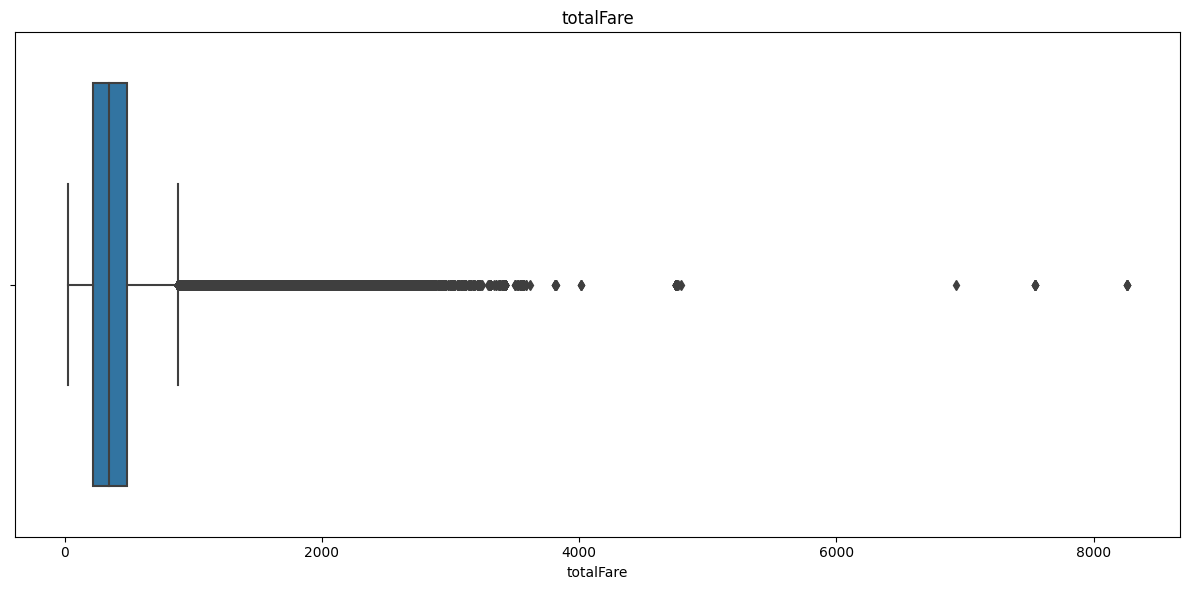

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the data with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_selected['totalFare'])
plt.title('totalFare')
plt.xlabel('totalFare')

# Show the plots
plt.tight_layout()
plt.show()

In [3]:
# Summary statistics for totalFare column
totalFare_stats = df_selected['totalFare'].describe()
print(totalFare_stats)

count    1.352000e+07
mean     3.737535e+02
std      2.075496e+02
min      2.397000e+01
25%      2.235800e+02
50%      3.446000e+02
75%      4.876000e+02
max      8.260610e+03
Name: totalFare, dtype: float64


In [4]:
# Additional statistics to help identify outliers
mean = df_selected['totalFare'].mean()
std_dev = df_selected['totalFare'].std()
median = df_selected['totalFare'].median()
iqr = totalFare_stats['75%'] - totalFare_stats['25%']  # Interquartile range

# Display the calculated statistics
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Median: {median}")
print(f"Interquartile Range (IQR): {iqr}")

Mean: 373.75351641298226
Standard Deviation: 207.54959415397542
Median: 344.6
Interquartile Range (IQR): 264.02


In [5]:
# Define potential outlier thresholds based on IQR
lower_bound = totalFare_stats['25%'] - 1.5 * iqr
upper_bound = totalFare_stats['75%'] + 1.5 * iqr

print(f"\nPotential Outlier Thresholds:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Potential Outlier Thresholds:
Lower Bound: -172.44999999999996
Upper Bound: 883.63


***totalFare has a right-skewed distribution with significant variability. These factors suggest that while most trips have fares within a certain range, a small number of trips—possibly due to longer distances, premium services, or other factors—are priced much higher, influencing the overall average.***

In [12]:
import numpy as np
# Perform log transformation on the totalFare column
df_selected['log_totalFare']=np.log1p(df_selected['totalFare'])

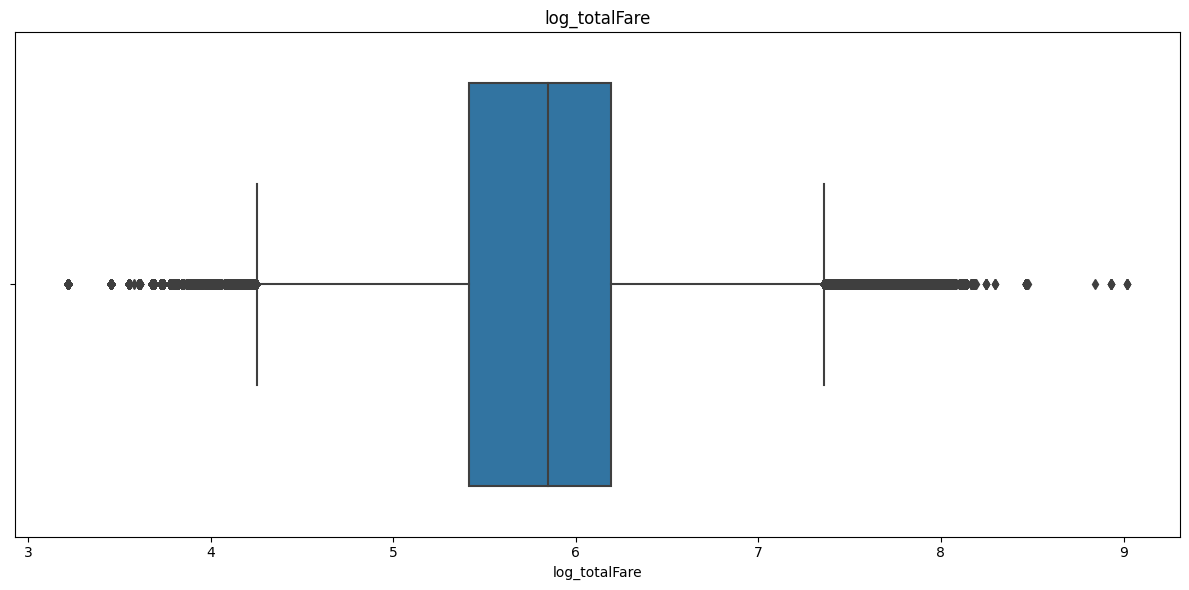

In [16]:
# Visualize the data with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_selected['log_totalFare'])
plt.title('log_totalFare')
plt.xlabel('log_totalFare')

# Show the plots
plt.tight_layout()
plt.show()

In [13]:
# Calculate the IQR and identify outliers
Q1 = df_selected['log_totalFare'].quantile(0.25)
Q3 = df_selected['log_totalFare'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df_selected[(df_selected['log_totalFare'] < lower_bound) | (df_selected['log_totalFare'] > upper_bound)]

# Print the outliers
print("Outliers in log_totalFare:")
print(outliers[['log_totalFare']])

Outliers in log_totalFare:

          log_totalFare

0              3.779405

1              3.988799

2              3.988799

34             4.168214

35             4.168214

...                 ...

13519711       4.168214

13519712       4.168214

13519713       4.168214

13519714       4.168214

13519893       4.007151



[138163 rows x 1 columns]


Original number of rows: 13519999

Number of rows after removing outliers: 13381836


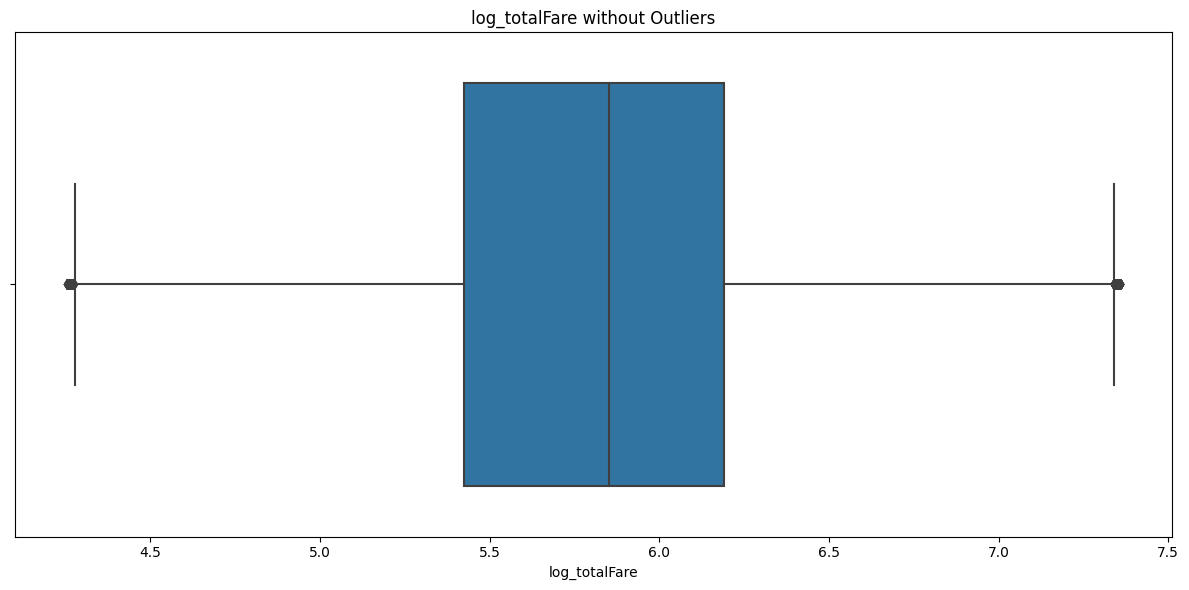

In [14]:
# Filter out the outliers
df_no_outliers = df_selected[(df_selected['log_totalFare'] >= lower_bound) & (df_selected['log_totalFare'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Original number of rows: {df_selected.shape[0]}")
print(f"Number of rows after removing outliers: {df_no_outliers.shape[0]}")

# Visualize the data without outliers with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_no_outliers['log_totalFare'])
plt.title('log_totalFare without Outliers')
plt.xlabel('log_totalFare')

# Show the plots
plt.tight_layout()
plt.show()

In [24]:
df_no_outliers.head()

flightDate                           segmentsDepartureTimeRaw  \
3  2022-06-14  [2022-06-14T05:45:00.000-04:00, 2022-06-14T12:...   
4  2022-06-14  [2022-06-14T21:30:00.000-04:00, 2022-06-15T06:...   
5  2022-06-14  [2022-06-14T08:25:00.000-04:00, 2022-06-14T12:...   
6  2022-06-14  [2022-06-14T14:30:00.000-04:00, 2022-06-14T17:...   
7  2022-06-14  [2022-06-14T14:30:00.000-04:00, 2022-06-14T21:...   

  segmentsCabinCode  totalFare  isRefundable  isNonStop  isBasicEconomy  \
3       coach,coach      87.06             0          0               0   
4       coach,coach      89.59             0          0               0   
5       coach,coach     107.68             0          0               0   
6       coach,coach     117.96             0          0               0   
7       coach,coach     117.96             0          0               0   

   no_of_trip  earliest_departure_index        earliest_departure  ...  \
3           2                         0 2022-06-14 09:45:00+00:00  ...   
4           2                         0 2022-06-15 01:30:00+00:00  ...   
5           2                         0 2022-06-14 12:25:00+00:00  ...   
6           2                         0 2022-06-14 18:30:00+00:00  ...   
7           2                         0 2022-06-14 18:30:00+00:00  ...   

  startingAirport_LGA  startingAirport_MIA  startingAirport_OAK  \
3                   0                    0                    0   
4                   0                    0                    0   
5                   0                    0                    0   
6                   0                    0                    0   
7                   0                    0                    0   

  startingAirport_ORD  startingAirport_PHL  startingAirport_SFO  Year  Month  \
3                   0                    1                    0  2022      6   
4                   0                    1                    0  2022      6   
5                   0                    1                    0  2022      6   
6                   0                    1                    0  2022      6   
7                   0                    1                    0  2022      6   

   Day  log_totalFare  
3   14       4.478018  
4   15       4.506344  
5   14       4.688408  
6   14       4.778787  
7   14       4.778787  

[5 rows x 54 columns]

# III. Prepare data for training

**[3.1]** Create a variable called X and extract the target variable into a variable called y

In [50]:
y = df_no_outliers['log_totalFare'].values.reshape(-1, 1)
X= df_no_outliers[['Month', 'Day','Hour', 'Minute',
               'Business Class', 'First Class', 'Mixed Coach & Premium Coach', 'Other',
       'Predominantly Coach', 'Rare & Mixed Class',
       'destinationAirport_BOS',
       'destinationAirport_CLT', 'destinationAirport_DEN',
       'destinationAirport_DFW', 'destinationAirport_DTW',
       'destinationAirport_EWR', 'destinationAirport_IAD',
       'destinationAirport_JFK', 'destinationAirport_LAX',
       'destinationAirport_LGA', 'destinationAirport_MIA',
       'destinationAirport_OAK', 'destinationAirport_ORD',
       'destinationAirport_PHL', 'destinationAirport_SFO',
       'startingAirport_BOS', 'startingAirport_CLT', 'startingAirport_DEN',
       'startingAirport_DFW', 'startingAirport_DTW', 'startingAirport_EWR',
       'startingAirport_IAD', 'startingAirport_JFK', 'startingAirport_LAX',
       'startingAirport_LGA', 'startingAirport_MIA', 'startingAirport_OAK',
       'startingAirport_ORD', 'startingAirport_PHL', 'startingAirport_SFO','isBasicEconomy','isRefundable', 'isNonStop']]

**[3.2]** Save X and y variables to save memory

In [16]:
import pickle
# Specify the filename
filename = 'split_data_ver2.pkl'

# Save X and y to a pickle file
with open(filename, 'wb') as file:
    pickle.dump({'X': X, 'y': y}, file)

print(f'Data saved to {filename}')

Data saved to split_data_ver2.pkl


In [18]:
import os
from IPython.display import FileLink

# Set the working directory to /kaggle/working
os.chdir(r'/kaggle/working')

# Display a download link for the file
display(FileLink(r'split_data_ver2.pkl'))

/kaggle/working/split_data_ver2.pkl

**[3.3]** Reload X and y for training

In [51]:
import pickle
filename = '/kaggle/input/itineraries/split_data_ver2.pkl'
# Load data from the pickle file
with open(filename, 'rb') as file:
    data = pickle.load(file)
    X = data['X']
    y = data['y']

print('Data loaded from pickle file.')

Data loaded from pickle file.


# IV. Correlation matrix

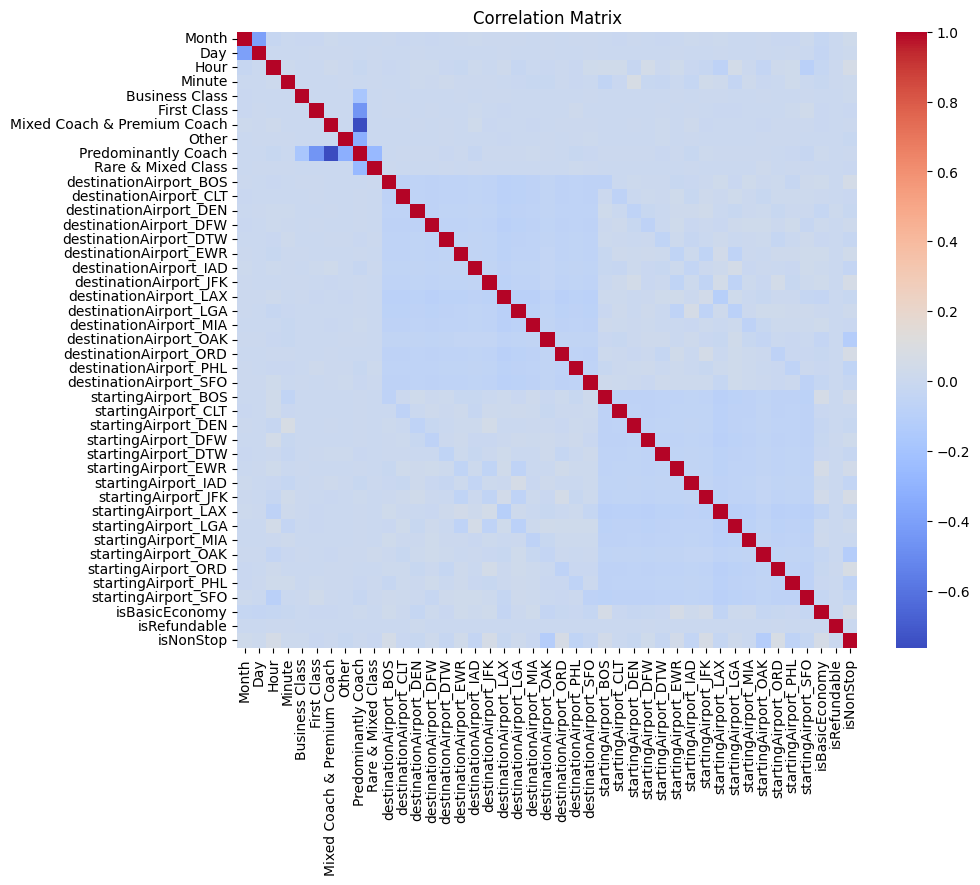

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = X.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)

# Show the plot
plt.title("Correlation Matrix")
plt.show()

# V. Data Splitting

**[5.1]** Split the features and target variable into 3 different sets with 60-20-20 ratio

In [52]:
from sklearn.model_selection import train_test_split
# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% train, 40% temp

# Split the temporary set into validation and test sets (50% of temp = 20% of original)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

# VI. Scale Data

In [53]:
# Import StandardScaler from Sklearn
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training set
X_train = scaler.fit_transform(X_train)

# Transform the validation and test sets
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [54]:
# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# VII. Baseline model

**[7.1]** Find the mean of the target variable

In [55]:
y_mean = y_train.mean()

**[7.2]** Create a numpy array called y_base filled with the mean

In [56]:
import numpy as np
y_base = np.full(y_train.shape, y_mean)

**[7.3]** Import the Mean Square Error and Mean Absolute Error from sklearn

In [57]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

**[7.4]** Display the MSE and MAE of this baseline model

In [58]:
print(mse(y_train, y_base, squared=True))
print(mae(y_train, y_base))

0.2820850273596535
0.43459737662635645


# VIII. Train LightGBM model with default parameters

**[8.1]** Instantiate the LightGBM class called reg with a random state=42

In [59]:
import lightgbm as lgb
# Initialize the LGBMRegressor model
reg = lgb.LGBMRegressor(objective='regression', random_state=42)

**[8.2]** Fit our model with the training data

In [60]:
reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.086720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 8029101, number of used features: 43
[LightGBM] [Info] Start training from score 5.789650


LGBMRegressor(objective='regression', random_state=42)

In [61]:
import pickle

with open('lightgbm_model.pkl', 'wb') as file:
    pickle.dump(reg, file)

print("Model saved successfully.")

Model saved successfully.


**[8.3]** Perform prediction on the training data

In [62]:
y_train_preds = reg.predict(X_train)

**[8.4]** Display the MSE and MAE scores on the training set

In [63]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [64]:
print(mse(y_train, y_train_preds, squared=True))
print(mae(y_train, y_train_preds))

0.10876455521241944
0.2538989261074365


**[8.4]** Display the combine scatter plot and line chart to compare predictions against actuals for the training set

In [65]:
import altair as alt

In [66]:
import pandas as pd
y_train_preds=pd.DataFrame(y_train_preds)

In [67]:
y_train_preds=y_train_preds.rename(columns={0:"TARGET_totalFare"})

In [68]:
y_train_df=pd.DataFrame(y_train)
y_train_df=y_train_df.rename(columns={0:'preds'})

In [69]:
import altair as alt
import pandas as pd

y_train_sampled = y_train_df.sample(n=min(len(y_train_df), 2000), random_state=42)
y_train_preds_sampled = y_train_preds.sample(n=min(len(y_train_preds), 2000), random_state=42)

# Create the line chart for actual predictions
perfect_chart = alt.Chart(pd.DataFrame({
    'target': y_train_sampled['preds'],
    'preds': y_train_sampled['preds']
})).mark_line(color='green').encode(
    x='target',
    y='preds'
).properties(title='Actual vs Predicted',width=600,
    height=800)

# Create the point chart for predicted values
pred_chart = alt.Chart(pd.DataFrame({
    'target': y_train_sampled['preds'],
    'preds': y_train_preds_sampled['TARGET_totalFare']
})).mark_point(color='red').encode(
    x='target',
    y='preds'
).properties(title='Predictions',width=600,
    height=800)

In [70]:
# Combine the two charts
combined_chart = perfect_chart + pred_chart

# Display the combined chart
combined_chart.interactive()

alt.LayerChart(...)

In [71]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_train, y_train_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.6144263443172879


**[8.4]** Use the trained model to perform prediction on the validation set

In [72]:
y_val_preds = reg.predict(X_val)
y_val_preds=pd.DataFrame(y_val_preds)

In [74]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_val, y_val_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.6148155126940447


**[8.5]** Display the MSE and MAE scores on the validation set

In [75]:
print(mse(y_val, y_val_preds, squared=True))
print(mae(y_val, y_val_preds))

0.10852622675364208
0.2535538260565289


**[8.6]** Display the combine scatter plot and line chart to compare predictions against actuals for the validation set

In [76]:
y_val_preds=y_val_preds.rename(columns={0:"TARGET_totalFare"})

In [77]:
y_val_df=pd.DataFrame(y_val)
y_val_df=y_val_df.rename(columns={0:'preds'})

In [78]:
import altair as alt
import pandas as pd

y_val_sampled = y_val_df.sample(n=min(len(y_train), 2000), random_state=42)
y_val_preds_sampled = y_val_preds.sample(n=min(len(y_val_preds), 2000), random_state=42)

# Create the line chart for actual predictions
perfect_chart = alt.Chart(pd.DataFrame({
    'target': y_val_sampled['preds'],
    'preds': y_val_sampled['preds']
})).mark_line(color='green').encode(
    x='target',
    y='preds'
).properties(title='Actual vs Predicted',width=600,
    height=800)

# Create the point chart for predicted values
pred_chart = alt.Chart(pd.DataFrame({
    'target': y_val_sampled['preds'],
    'preds': y_val_preds_sampled['TARGET_totalFare']
})).mark_point(color='red').encode(
    x='target',
    y='preds'
).properties(title='Predictions',width=600,
    height=800)

In [79]:
# Combine the two charts
combined_chart = perfect_chart + pred_chart

# Display the combined chart
combined_chart.interactive()

alt.LayerChart(...)

**[8.7]** Use the trained model to perform prediction on the testing set

In [80]:
y_test_preds = reg.predict(X_test)

In [81]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.614444668130147


**[8.8]** Display the MSE and MAE scores on the testing set

In [82]:
print(mse(y_test, y_test_preds, squared=True))
print(mae(y_test, y_test_preds))

0.10874734233397972
0.2539466514476149


**[8.9]** Display the combine scatter plot and line chart to compare predictions against actuals for the testing set

In [83]:
y_test_df=pd.DataFrame(y_test)
y_test_df=y_test_df.rename(columns={0:'preds'})

In [84]:
y_test_preds=pd.DataFrame(y_test_preds)
y_test_preds=y_test_preds.rename(columns={0:'preds'})

In [85]:
import altair as alt
import pandas as pd

y_test_sampled = y_test_df.sample(n=min(len(y_train), 2000), random_state=42)
y_test_preds_sampled = y_test_preds.sample(n=min(len(y_test_preds), 2000), random_state=42)

# Create the line chart for actual predictions
perfect_chart = alt.Chart(pd.DataFrame({
    'target': y_val_sampled['preds'],
    'preds': y_val_sampled['preds']
})).mark_line(color='green').encode(
    x='target',
    y='preds'
).properties(title='Actual vs Predicted',width=600,
    height=800)

# Create the point chart for predicted values
pred_chart = alt.Chart(pd.DataFrame({
    'target': y_val_sampled['preds'],
    'preds': y_val_preds_sampled['TARGET_totalFare']
})).mark_point(color='red').encode(
    x='target',
    y='preds'
).properties(title='Predictions',width=600,
    height=800)

In [86]:
# Combine the two charts
combined_chart = perfect_chart + pred_chart

# Display the combined chart
combined_chart.interactive()

alt.LayerChart(...)

**[8.10]** Import `LimeTabularExplainer` from `lime.lime_tabular`

In [87]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [88]:
from lime.lime_tabular import LimeTabularExplainer

**[8.11]** Create a `LimeTabularExplainer` with the training set and save it into a variable called `explainer`

In [89]:
# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,  # Training data as NumPy array
    mode='regression',            
    feature_names=X.columns,    # Feature names from the DataFrame
    verbose=True,
    random_state=42
)

**[8.12]** Analyse the first observation from the testing set with `lime_explainer` for the top value of the target variable

In [90]:
i = 0  # Index of the test instance
exp = explainer.explain_instance(X_test[i], reg.predict, num_features=10)

Intercept 5.84965084186316
Prediction_local [5.53206018]
Right: 5.45510633604215


**[8.13]** Display the results with `show_in_notebook`

In [91]:
# Show explanation in a notebook
exp.show_in_notebook(show_table=True, show_all=True)

# IX. Fine tune LightGBM model

**[9.1]** Import the BayesianOptimization from bayes_opt library

In [94]:
from bayes_opt import BayesianOptimization

**[9.2]** Perform hyperparameter fine-tuning using BayesianOptimization

In [95]:
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from bayes_opt import BayesianOptimization

# Define your objective function to optimize
def optimize_lightgbm(learning_rate, n_estimators, num_leaves, max_depth, subsample):
    learning_rate = float(learning_rate)
    n_estimators = int(n_estimators)
    num_leaves = int(num_leaves)
    max_depth = int(max_depth)
    subsample = float(subsample)

    # Create a LightGBM Regressor with the specified hyperparameters
    reg = lgb.LGBMRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        num_leaves=num_leaves,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )

    # Fit the model on the training data (using ravel to flatten y_train)
    reg.fit(X_train, y_train.ravel())

    # Predict on the validation data (using ravel to flatten y_val)
    y_pred = reg.predict(X_val)

    # Calculate the mean squared error on the validation data
    minus_mse = (-1) * mean_squared_error(y_val.ravel(), y_pred)

    return minus_mse

# Define the bounds for hyperparameter optimization
param_bounds = {
    'learning_rate': (0.01, 0.1),
    'n_estimators': (50, 300),
    'num_leaves': (20, 100),
    'max_depth': (3, 20),
    'subsample': (0.5, 1.0)
}

# Create a BayesianOptimization object
opt = BayesianOptimization(f=optimize_lightgbm, pbounds=param_bounds, random_state=42)

# Perform Bayesian optimization
opt.maximize(init_points=5, n_iter=10)

# Get the best set of hyperparameters
best_params = opt.max['params']

# Print the best hyperparameters and the corresponding MSE score
print("Best Hyperparameters:")
print(best_params)
print("\nBest MSE Score:")
print(-opt.max['target'])  # Convert back to positive MSE


|   iter    |  target   | learni... | max_depth | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.149125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 8029101, number of used features: 43
[LightGBM] [Info] Start training from score 5.789650
| 1         | -0.09733  | 0.04371   | 19.16     | 233.0     | 67.89     | 0.578     |
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.114533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 8029101, number of used features: 43
[LightGBM] [Info] Start training from score 5.789650
| 2         | -0.1523   | 0.02404   | 3.987     | 266.5 

**[9.2]** Instantiate the LightGBM class called reg with  with the best hyperparameters from the result of BayesianOptimization

In [96]:
import lightgbm as lgb
# Initialize the LGBMRegressor model
reg = lgb.LGBMRegressor(
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    num_leaves=int(best_params['num_leaves']),
    max_depth=int(best_params['max_depth']),
    subsample=best_params['subsample'],
    random_state=42
)

**[9.3]** Fit the model on the training set

In [97]:
reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.347795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 8029101, number of used features: 43
[LightGBM] [Info] Start training from score 5.789650


LGBMRegressor(max_depth=20, n_estimators=231, num_leaves=100, random_state=42,
              subsample=0.5)

In [98]:
import pickle

with open('lightgbm_model_fined_tune.pkl', 'wb') as file:
    pickle.dump(reg, file)

print("Model saved successfully.")

Model saved successfully.


**[9.4]** Perform prediction on the training data

In [99]:
y_train_preds = reg.predict(X_train)

**[9.5]** Display the MSE and MAE scores on the training set

In [100]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [101]:
print(mse(y_train, y_train_preds, squared=True))
print(mae(y_train, y_train_preds))

0.08065241686109656
0.21591726019038035


**[9.6]** Display the combine scatter plot and line chart to compare predictions against actuals for the training set

In [102]:
import altair as alt

In [106]:
import pandas as pd
y_train_preds_df=pd.DataFrame(y_train_preds)

In [107]:
y_train_preds_df=y_train_preds_df.rename(columns={0:"TARGET_totalFare"})

In [108]:
y_train_df=pd.DataFrame(y_train)
y_train_df=y_train_df.rename(columns={0:'preds'})

In [109]:
import altair as alt
import pandas as pd

y_train_sampled = y_train_df.sample(n=min(len(y_train), 2000), random_state=42)
y_train_preds_sampled = y_train_preds_df.sample(n=min(len(y_train_preds), 2000), random_state=42)

# Create the line chart for actual predictions
perfect_chart = alt.Chart(pd.DataFrame({
    'target': y_train_sampled['preds'],
    'preds': y_train_sampled['preds']
})).mark_line(color='green').encode(
    x='target',
    y='preds'
).properties(title='Actual vs Predicted',width=600,
    height=800)

# Create the point chart for predicted values
pred_chart = alt.Chart(pd.DataFrame({
    'target': y_train_sampled['preds'],
    'preds': y_train_preds_sampled['TARGET_totalFare']
})).mark_point(color='red').encode(
    x='target',
    y='preds'
).properties(title='Predictions',width=600,
    height=800)

In [110]:
# Combine the two charts
combined_chart = perfect_chart + pred_chart

# Display the combined chart
combined_chart.interactive()

alt.LayerChart(...)

In [111]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_train, y_train_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.7140847296433563


**[9.7]** Perform prediction on the validation set

In [112]:
y_val_preds_df = reg.predict(X_val)

In [113]:
y_val_preds_df=pd.DataFrame(y_val_preds_df)

In [114]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_val, y_val_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.6148155126940447


**[9.8]** Display the MSE and MAE scores on the validation set

In [115]:
print(mse(y_val, y_val_preds, squared=True))
print(mae(y_val, y_val_preds))

0.10852622675364208
0.2535538260565289


**[9.9]** Display the combine scatter plot and line chart to compare predictions against actuals for the validation set

In [116]:
y_val_preds_df=y_val_preds_df.rename(columns={0:"TARGET_totalFare"})

In [117]:
y_val_df=pd.DataFrame(y_val)
y_val_df=y_val_df.rename(columns={0:'preds'})

In [118]:
import altair as alt
import pandas as pd

y_val_sampled = y_val_df.sample(n=min(len(y_train), 2000), random_state=42)
y_val_preds_sampled = y_val_preds_df.sample(n=min(len(y_val_preds), 2000), random_state=42)

# Create the line chart for actual predictions
perfect_chart = alt.Chart(pd.DataFrame({
    'target': y_val_sampled['preds'],
    'preds': y_val_sampled['preds']
})).mark_line(color='green').encode(
    x='target',
    y='preds'
).properties(title='Actual vs Predicted',width=600,
    height=800)

# Create the point chart for predicted values
pred_chart = alt.Chart(pd.DataFrame({
    'target': y_val_sampled['preds'],
    'preds': y_val_preds_sampled['TARGET_totalFare']
})).mark_point(color='red').encode(
    x='target',
    y='preds'
).properties(title='Predictions',width=600,
    height=800)

In [119]:
# Combine the two charts
combined_chart = perfect_chart + pred_chart

# Display the combined chart
combined_chart.interactive()

alt.LayerChart(...)

**[9.10]** Perform prediction on the testing set

In [120]:
y_test_preds = reg.predict(X_test)

In [121]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.7140155818604865


**[9.11]** Display the MSE and MAE scores on the testing set

In [122]:
print(mse(y_test, y_test_preds, squared=True))
print(mae(y_test, y_test_preds))

0.08066298881349596
0.21600163251942525


**[9.12]** Display the combine scatter plot and line chart to compare predictions against actuals for the testing set

In [123]:
y_test_df=pd.DataFrame(y_test)
y_test_df=y_test_df.rename(columns={0:'preds'})

In [124]:
y_test_preds_df=pd.DataFrame(y_test_preds)
y_test_preds_df=y_test_preds_df.rename(columns={0:'preds'})

In [125]:
import altair as alt
import pandas as pd

y_test_sampled = y_test_df.sample(n=min(len(y_train), 2000), random_state=42)
y_test_preds_sampled = y_test_preds_df.sample(n=min(len(y_test_preds), 2000), random_state=42)

# Create the line chart for actual predictions
perfect_chart = alt.Chart(pd.DataFrame({
    'target': y_val_sampled['preds'],
    'preds': y_val_sampled['preds']
})).mark_line(color='green').encode(
    x='target',
    y='preds'
).properties(title='Actual vs Predicted',width=600,
    height=800)

# Create the point chart for predicted values
pred_chart = alt.Chart(pd.DataFrame({
    'target': y_val_sampled['preds'],
    'preds': y_val_preds_sampled['TARGET_totalFare']
})).mark_point(color='red').encode(
    x='target',
    y='preds'
).properties(title='Predictions',width=600,
    height=800)

In [126]:
# Combine the two charts
combined_chart = perfect_chart + pred_chart

# Display the combined chart
combined_chart.interactive()

alt.LayerChart(...)

**[9.13]** Create a `LimeTabularExplainer` with the training set and save it into a variable called `explainer`

In [128]:
# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,  # Training data as NumPy array
    mode='regression',
    feature_names=X.columns,    # Feature names from the DataFrame
    verbose=True,
    random_state=42
)

**[9.14]** Analyse the first observation from the testing set with `lime_explainer` for the top value of the target variable

In [129]:
i = 0  # Index of the test instance
exp = explainer.explain_instance(X_test[i], reg.predict, num_features=10)

Intercept 6.110393490792457
Prediction_local [5.49665695]
Right: 5.62267117865196


**[9.15]** Display the results with `show_in_notebook`

In [130]:
# Show explanation in a notebook
exp.show_in_notebook(show_table=True, show_all=True)